<a href="https://colab.research.google.com/github/OmTamrakar914/ComputerVision2-course/blob/main/Heart_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Importing Libraries**

In [ ]:
import pandas as pd

**2.Importing the Dataset**

In [ ]:
data = pd.read_csv('heart.csv')

**3.Taking care of Missing values**




In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**4. Removing Duplicates values**

In [ ]:
data_dupi = data.duplicated().any()

In [ ]:
data_dupi

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data_dupi = data.duplicated().any()

In [ ]:
data_dupi

False

**5.Data Processing**

In [ ]:
cate_val=[]
numc_val=[]

for column in data.columns:
  if data[column].nunique() <=10:
    cate_val.append(column)
  else:
    numc_val.append(column)

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
numc_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**6.Categorial Data Encoding**

In [ ]:
data['cp'].unique()

array([0, 1, 2, 3])

In [ ]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [ ]:
cate_val

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


**7.Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
data[numc_val] = st.fit_transform(data[numc_val])

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


**8.Splitting the Dataset into Training set and Test set**

In [ ]:
X = data.drop('target',axis=1)

In [ ]:
y= data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
y_test.size

61

**9.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predic1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_predic1)

0.7868852459016393

10. **SVC**

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_predic2= svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predic2)

0.8032786885245902

**11.KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predic3= knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predic3)

0.7377049180327869

for finding better Accuracy

In [ ]:
score=[]

for k in range(1,40):
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred= knn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))


In [ ]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [ ]:
 knn= KNeighborsClassifier(2)
 knn.fit(X_train,y_train)
 y_pred= knn.predict(X_test)
 accuracy_score(y_test,y_pred)

0.8032786885245902

**Non-Linear ML Algorithms**

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(302, 14)

In [ ]:
X = data.drop('target',axis=1)
y=data['target']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

**12.Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predic4= dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predic4)

0.7049180327868853

**13.Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_predic5  = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predic5)

0.8524590163934426

**14.Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gdc = GradientBoostingClassifier()

In [ ]:
gdc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_predic6 = gdc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predic6)

0.8032786885245902

In [ ]:
final_data = pd.DataFrame({'Model':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test,y_predic1),accuracy_score(y_test,y_predic2),accuracy_score(y_test,y_predic3),accuracy_score(y_test,y_predic4),accuracy_score(y_test,y_predic5),accuracy_score(y_test,y_predic6)]})

In [ ]:
final_data

,Model,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.704918
4,RF,0.852459
5,GB,0.803279


In [ ]:
import seaborn as sns

<Axes: xlabel='Model', ylabel='ACC'>

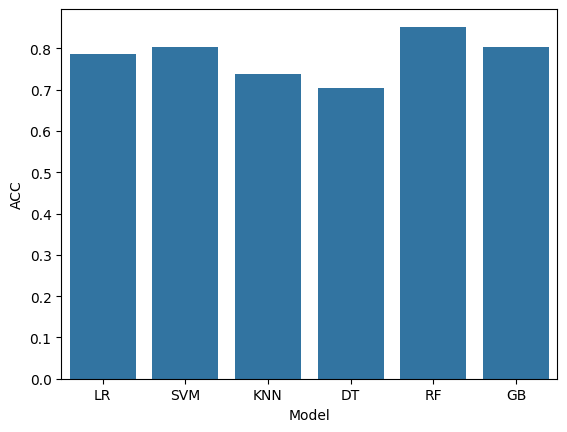

In [ ]:
sns.barplot(x=final_data["Model"], y=final_data["ACC"])

**Selecting the model with best accuracy and training the whole dataset**

In [ ]:
X = data.drop('target',axis=1)
y=data['target']

In [ ]:
X.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

**15.Prediction on New Data**

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.DataFrame({
    'age':53,'sex':1,'cp':0,'trestbps':125,'chol':212,'fbs':0,'restecg':1,'thalach':168,'exang':0,'oldpeak':1.0,'slope':2,'ca':2,'thal':3
},index=[0])

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
p = rf.predict(new_data)
if p[0]==0:
  print("No Disease")
else:
  print("Disease")

No Disease


**16.Saving Model using Joblib**

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'model1_heart_job')

['model1_heart_job']

In [ ]:
model = joblib.load('model1_heart_job')

In [ ]:
model.predict(new_data)

array([0])

**Quantative Analysis**

**1.Calculating F1 score and Plotting ROC curve**

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import joblib
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

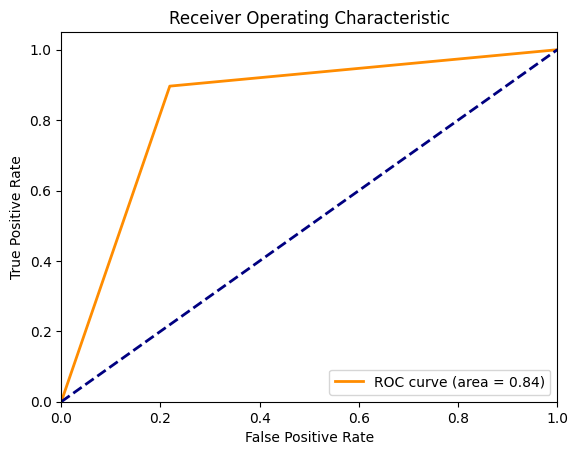

F1 Score: 0.8387096774193549


In [ ]:
model = joblib.load('model1_heart_job')


feature_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
    'slope', 'ca', 'thal'
]

X = data[feature_names]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_predic7 = model.predict(X_test)

f1 = f1_score(y_test,y_predic7)

fpr,tpr, _=roc_curve(y_test,y_predic7)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


print("F1 Score:", f1)



**2.Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model,X,y,cv=10)

print("Cross-Validation scores:", cv_score)
print("Mean CV dcore:", np.mean(cv_score))
print("Standard deviation of CV scores:", np.std(cv_score))

Cross-Validation scores: [0.80645161 0.80645161 0.8        0.86666667 0.86666667 0.9
 0.76666667 0.83333333 0.83333333 0.83333333]
Mean CV dcore: 0.8312903225806452
Standard deviation of CV scores: 0.0369130560634461


**Qualitative Analysis**

**1.Feature Importance Analysis**

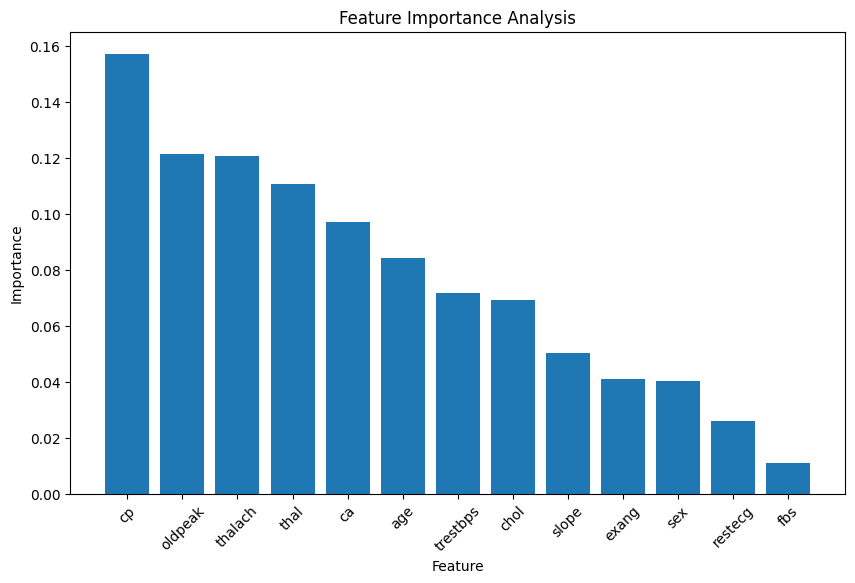

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[indices], align='center')
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis')
plt.show()

**2.Visualization of Model Predictions:**

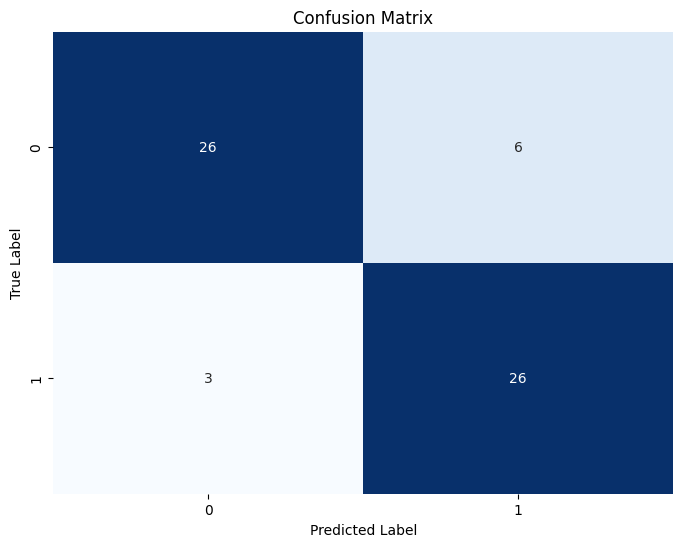

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_predic5)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**GUI**

In [ ]:

model = joblib.load('model1_heart_job')

feature_names = ['Age :', 'Gender :', 'Chestpain :', 'Rest BP :', 'Cholestrol :','FBS :', 'Rest ECG :', 'Thalac :', 'Exang :', 'Oldpeak :','Slope :', 'CA ', 'Thal :']


input_widgets = []
for name in feature_names:
    input_widgets.append(widgets.FloatText(description=name))


predict_button = widgets.Button(description='Predict')
output_label = widgets.Label()


def predict(event):
    try:
        input_data = [widget.value for widget in input_widgets]

        prediction = model.predict(np.array(input_data).reshape(1, -1))


        if prediction[0] == 0:
            output_label.value = "No Heart Disease"
        else:
            output_label.value = "Possibility of Heart Disease"
    except ValueError:
        output_label.value = "Invalid Input"


predict_button.on_click(predict)
display(widgets.VBox(input_widgets + [predict_button, output_label]))
